<a href="https://colab.research.google.com/github/lukasvalentino971/PCVK-2023/blob/main/Week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Kelompok 3 - TI 3H*
1. Mohammad Izamul Fikri Fahmi - 2141720171
2. Lukas Valentino - 2141720032
3. Septi Lutfiani - 2141720038

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Gamma Correction

In [13]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 2


In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

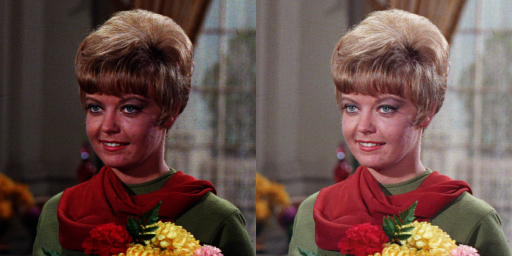

In [15]:
original =cv2.imread('/content/drive/MyDrive/PCVK-2023/female.tiff')
gamma_image = np.zeros(original.shape,original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gamma_image[y,x,c]=np.clip(255 * ((original[y,x,c]/255)**(1/gamma)) ,0,255)

final_frame=cv2.hconcat ((original,gamma_image))
cv2_imshow(final_frame)

2. Image Depth

 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 2


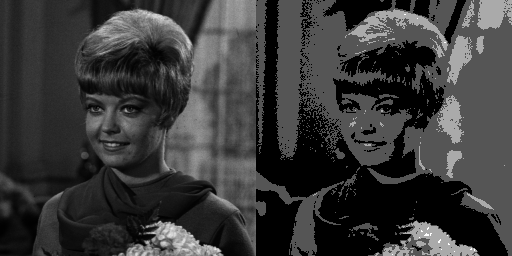

In [16]:
import cv2
import numpy as np

original = cv2.imread('/content/drive/MyDrive/PCVK-2023/female.tiff', cv2.IMREAD_GRAYSCALE)
gamma_image = np.zeros(original.shape, original.dtype)

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    gamma_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255);

final_frame = cv2.hconcat((original, gamma_image))
cv2_imshow(final_frame)



**3. Average Denoising**

Jumlah Citra di Average = 5, Nilai PSNR (dB): 27.53723453798287
Jumlah Citra di Average = 10, Nilai PSNR (dB): 27.554902806593322
Jumlah Citra di Average = 20, Nilai PSNR (dB): 27.507417758639793
Jumlah Citra di Average = 40, Nilai PSNR (dB): 27.45860393754972
Jumlah Citra di Average = 80, Nilai PSNR (dB): 27.39875848242526
Jumlah Citra di Average = 100, Nilai PSNR (dB): 27.370931279516654


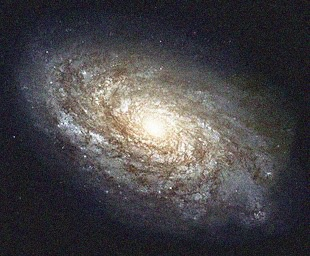

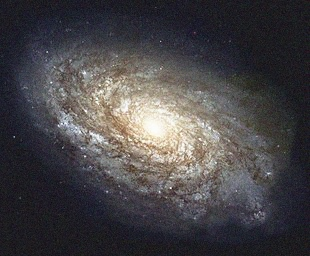

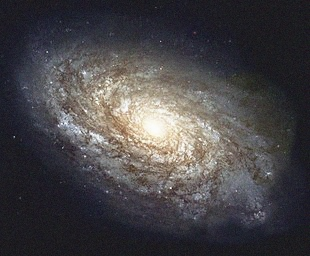

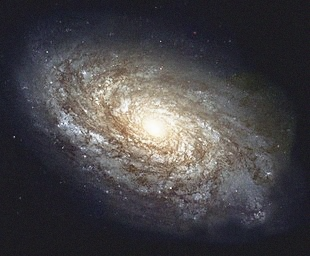

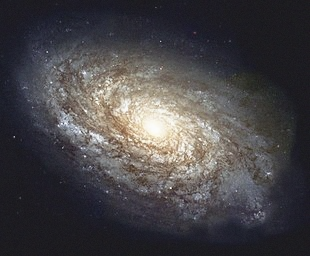

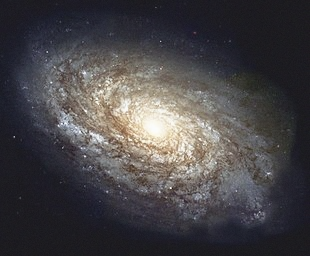

In [18]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import glob

# Membaca citra asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK-2023/galaxy.jpg')

# Inisialisasi array untuk menyimpan citra hasil penggabungan
combined_images = []

# Daftar jumlah citra yang akan di-average
jumlah_citra = [5, 10, 20, 40, 80, 100]

# Membaca citra-citra dengan Gaussian Noise dari folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK-2023/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

# Proses penggabungan citra dengan Gaussian Noise ke citra asli untuk setiap jumlah citra
for n in jumlah_citra:
    # Mengambil n citra pertama
    noise_images_to_average = cv_img[:n]

    # Menghitung citra rata-rata dari n citra tersebut
    average_combined_image = np.mean(noise_images_to_average, axis=0).astype(np.uint8)

    # Menambahkan citra rata-rata ke dalam array
    combined_images.append(average_combined_image)

    # Hitung PSNR antara citra asli dan citra rata-rata hasil penggabungan
    mse = np.mean((original_image - average_combined_image) ** 2)
    if mse == 0:
        psnr = 100  # PSNR tak terbatas jika MSE adalah 0
    else:
        max_pixel = 255.0
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

    # Tampilkan atau cetak nilai PSNR
    print(f"Jumlah Citra di Average = {n}, Nilai PSNR (dB): {psnr}")

# Anda juga dapat menampilkan atau menyimpan citra hasil penggabungan untuk setiap jumlah citra
for i, image in enumerate(combined_images):
    cv2_imshow(image)


4. Image Masking (Gambar 2)

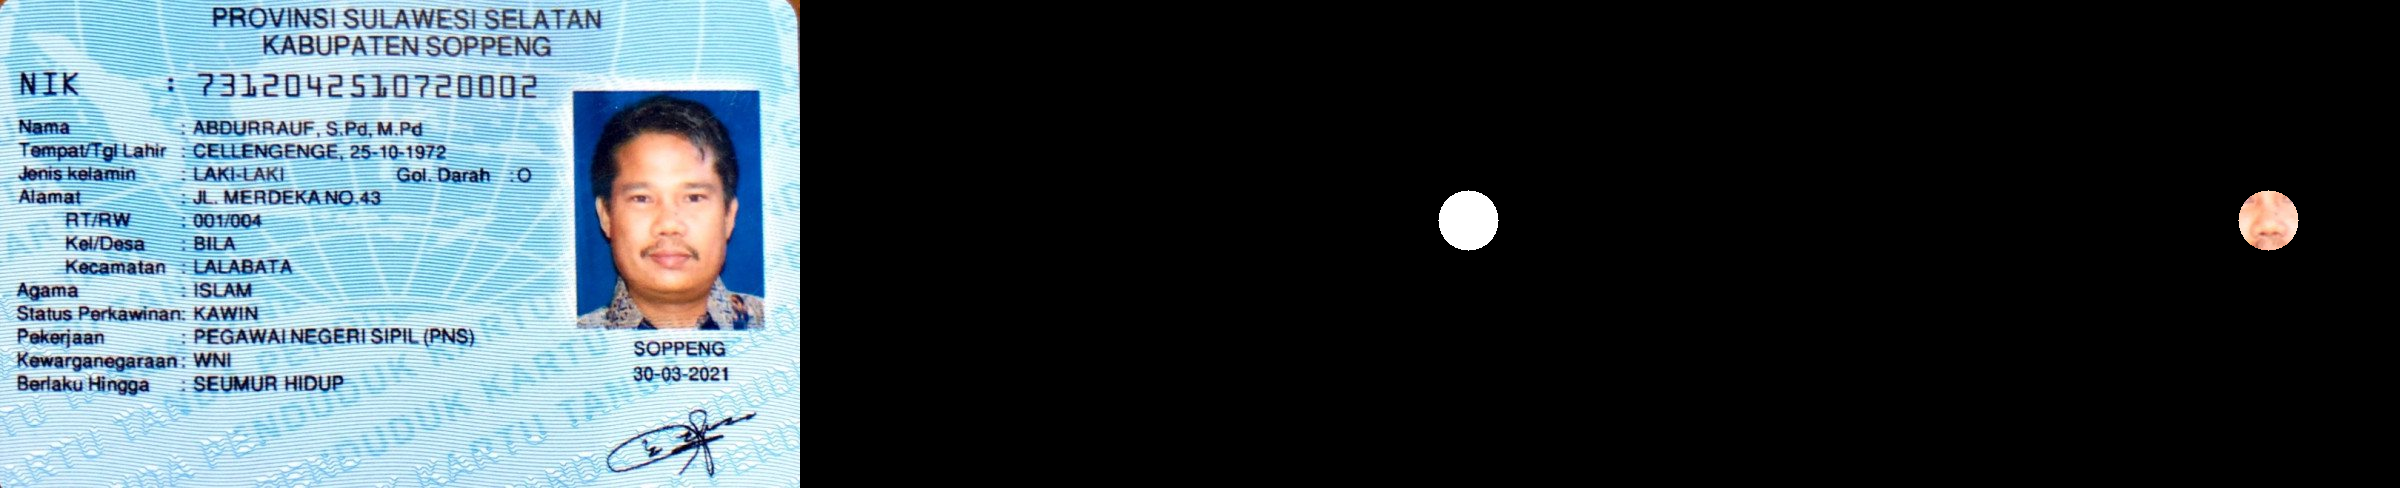

In [32]:

path='/content/drive/MyDrive/PCVK-2023/KTP.jpg'
KTP=cv2.imread(path)
mask = np.zeros_like(KTP)

center1 = (668, 220)
radius1 = 30

cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv2.bitwise_and(KTP, mask)

final_frame = cv2.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

1. NOT

2. OR

3. And

4. NAND